In [2]:
from fipy import Variable, FaceVariable, CellVariable, Grid1D, TransientTerm, DiffusionTerm, ConvectionTerm, PowerLawConvectionTerm, FirstOrderAdvectionTerm, AdvectionTerm, Viewer
from fipy.tools import numerix

In [7]:
#solving del(D*del(phi) + u*phi)
L = 10
nx = 10
mesh = Grid1D(dx=L / nx, nx=nx)

phi = CellVariable(mesh=mesh, name="solution variable")

diffCoeff = 1

#boundary conditions
valueLeft = 1
valueRight = 0.5
phi.constrain(valueLeft, mesh.facesLeft)
phi.constrain(valueRight, mesh.facesRight)

#reset the initial conditions
phi.setValue(0)

#eq = DiffusionTerm(coeff=diffCoeff) + FirstOrderAdvectionTerm(coeff=(1*(1-phi)))
convectionCoeff = FaceVariable(mesh=mesh, value=1 - phi.arithmeticFaceValue)
eq = TransientTerm(coeff=1)/(0.1+phi) + ConvectionTerm(coeff=(1,)) - 0.5/(0.1+phi)

timeStep = 0.1
steps = 50

for step in range(steps): 
    eq.solve(var=phi, dt=timeStep)

viewer = Viewer(vars=phi)

TermMultiplyError: Must multiply terms by int or float.

In [ ]:
import deepxde as dde
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
geom = dde.geometry.Interval(0,10)

def ode(x, y):
    dydx = dde.grad.jacobian(y, x)
    return v0*(1-y)*dydx


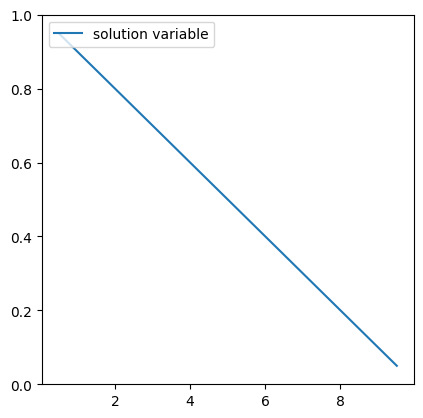

In [43]:
L = 10
nx = 10
mesh = Grid1D(dx=L / nx, nx=nx)

phi = CellVariable(mesh=mesh, name="solution variable")

diffCoeff = 1

#boundary conditions
valueLeft = 1
valueRight = 0
phi.constrain(valueLeft, mesh.facesLeft)
phi.constrain(valueRight, mesh.facesRight)

#reset the initial conditions
phi.setValue(0)

eq = DiffusionTerm(coeff=diffCoeff)
eq.solve(var=phi)

viewer = Viewer(vars=phi, datamin=0., datamax=1.)